## NumPy

### Généralités

Nous avons brièvement importé le paquet Numpy dans le [tutoriel 4](./Tutorial_4_Imports_functions.ipynb) afin de permettre de diviser une liste d'entiers par un nombre de manière efficace et pratique, alors que ces opérations ne fonctionnent pas sur des objets `list`. Mais NumPy est un très gros module et Python et contient un très grand nombre de fonctions permettant de travailler avec les nombres, entre autres : 

* [Des méthodes permettant de créer et manipuler des vecteurs et des matrices, généralisés sous la forme de `np.ndarray()`](#Les-objets-np.ndarray). Les amateurs de MATLAB seront heureux de les retrouver :-)
* [Des définitions pour quasiment toutes constantes et les fonctions mathématiques usuelles](#Constantes-et-fonctions-mathematiques), y compris les fonctions hyperboliques et leurs réciproques (par exemple `arctanh`)
* [Des fonctions d'intérêt pour manipuler les valeurs de vos tableaux](#Fonctions-utilitaires-de-Numpy) 
  * Calculer des sommes des intégrales et des dérivées 
  * Trier des tableaux par ordre croissant ou selon l'ordre d'un autre tableau
  * Arrondir des valeurs ou des tableaux entiers
  
Je conseille aux étudiants de faire une pause après avoir vu ces trois premières parties, car c'est déjà un très gros morceau, équivalent à au moins un tutoriel complet précédent. Ils pourront ensuite se pencher sur les sous-modules suivants de Numpy : 

* Des fonctions associées à l'algèbre linéaire et les matrices, qui vous permettront de faire des belles multiplications, des inversions et des diagonalisations avec [le sous-module `numpy.linalg`](#matrices-algebre-et-regression-lineaire-avec-numpy).
* Quelques fonctions d'intérêt pour effectuer des statistiques, créer des histogrammes et générer des nombres aléatoires avec [le sous-module `numpy.random`.](#tentez-votre-chance--statistiques-et-nombres-aleatoires)
* Et les fonctions et la syntaxe associée aux _transformées de Fourier_, `numpy.fft`.

Sachez qu'une grande partie du code de NumPy est en fait écrit en C, avec une sur-couche de Python par-dessus. Les fonctions NumPy sont donc bien optimisées pour le travail avec les grandes matrices, et peuvent être encore _accélérées_ si le besoin s'en ressent en utilisant des modules supplémentaires, par exemple [Numba](https://numba.pydata.org/) qui va compiler votre code et éventuellement le _paralléliser_ sur les coeurs de votre processeur, ou même votre carte graphique. 

-------------------------------

### Les objets `np.ndarray`

Nous l'avons brièvement aperçue précédemment. Quand les éléments des `np.ndarray` sont des nombres, les `np.ndarray` représentent des vecteurs, des matrices ou même des tenseurs d'ordre (de dimension) plus élevée. Ils fonctionnent presque comme les listes, et toute la syntaxe associée va donc leur ressembler fortement, __hormis leur comportement avec les opérateurs usuels (+, *, -, / et **) et leur indexation__. On crée de tels objets assez simplement par exemple à partir d'une liste et de la fonction `np.array()`: 

In [ ]:
import numpy as np
x = np.array([3,4,5])

print(x)
print(type(x))

#### Indexation et _coupes_ /!\\


##### Indexation et coupes simples (à un indice)

Les `np.ndarray` s'indexent d'une manière différente que les objets `list` en Python. Pour les tableaux à une dimension, toutefois, rien de bien méchant, on peut facilement récupérer un élément, ou une _coupe_ ([cf Tutoriel 2](./Tutorial_2_ListsTuplesDicts.ipynb#Coupes)) et les résultats sont identiques à ceux obtenus pour les listes :

In [ ]:
my_list = [1,2,6,9,11,-3]
my_array = np.array(my_list)
print(my_list[5])
print(my_array[5])
print(my_list[2:4])
print(my_array[2:4])

Construisons une liste de 3 listes contenant chacune 3 nombres appelée `mylist_of_lists` (cf ci-dessous). Ma liste de listes peut être vue comme une matrice $3 \times 3$. Regardons ce qui arrive lorsque j'essaie d'indicer ma liste de liste et le tableau de manière 'simple', c'est à dire juste avec un indice : 

In [ ]:
mylist_of_lists = [[1,7,2],[3,4,5],[6,7,8]]
my_matrix = np.array(mylist_of_lists)

print(mylist_of_lists[1])
print(my_matrix[1])

Les résultats sont identiques, ce qui est pour l'instant plutôt rassurant ! Il est d'ailleurs possible de faire la même chose avec une coupe, par exemple en remplaçant le `[1]` par `[:]`, et les résultats seront (aux détails de l'affichage près) identiques. 



##### Coupes multi-dimensionnelles des tableaux à d > 1  /!\\

Supposons maintenant que Je voudrais faire une _coupe multidimensionnelle_ de cette matrice : dans mon cas précis, je souhaiterais ne garder que le bloc $2\times 2$ correspondant au nombres 'en bas à droite' de la matrice initiale. On peut assez facilement sélectionner les deux dernières lignes de la liste de liste avec la _coupe_ `[1:3]`, mais il n'est pas possible de directement sélectionner certaines 'colonnes de la matrice' dans la liste de listes. Voyez plutôt : 

In [ ]:
mylist_of_lists = [[1,7,2],[3,9,4],[11,-7,0]]

print(mylist_of_lists[1:3])                                # Almost, but not quite
print(mylist_of_lists[1:3][1:3])                           # Does not do what we want ...

Pour faire une sélection sur les colonnes, il nous faudra examiner un par les deux derniers élements de la liste de listes (c'est à dire les deux dernières lignes de la matrice $3\times 3$) et pour chacune de ces deux lignes (ou _sous-listes_), ne garder que les deux derniers nombres. On ne peut effectuer une telle opération qu'avec une boucle `for` :

In [ ]:
mylist_of_lists = [[1,7,2],[3,9,4],[11,-7,0]]

sub_list_of_lists = []
for row in mylist_of_lists[1:]:
    sub_list_of_lists.append(row[1:])
print(sub_list_of_lists)                                           # Too Complicated ! 

_NumPy_ va ici grandement nous aider, car il permet de faire des coupes selon plusieurs dimensions en utilisant la syntaxe 
```
sub_matrix = my_matrix[a:b,c:d:e,f:g, ...]
```
Ce qui va sélectionner 
* les _lignes_ $a$ à $b-1$ dans la première dimension
* les _colonnes_ $c, c+e, c+2e, \ldots, d-1$ dans la deuxième dimension
* les _couches_ $f$ à $g-1$ dans la troisième dimension
* etc. etc. pour les dimensions suivantes 

Pour le cas de l'exemple précédent : 

In [ ]:
mylist_of_lists = [[1,7,2],[3,9,4],[11,-7,0]]
my_matrix = np.array(mylist_of_lists)
print(my_matrix[1:3,1:3])   # Quick and easy ! 

##### Indexation logique

Il existe des [méthodes plus avancées pour indicer vos tableaux](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing). Je ne vais pas toutes les détailler ici, car ces méthodes vont rendre ce cours vraiment confus, et je pense qu'il y a déjà beaucoup d'informations dans ce long module. N'hésitez pas toutefois à aller lire la page de documentation ci-dessus si vous avez besoin d'effectuer un indiçage bien particulier qui n'est pas décrit ici :-) . 

Je vais me borner à expliquer l'indiçage _logique_ (ou booléen), qui est possible sous NumPy comme sous MATLAB. Le principe est le suivant : plutôt d'indicer ou de découper un tableau avec des _indices_ `[i,j,k]` ou des coupes `[a:b:c, d:e, ...]`, on va 'indicer' un tableau `x` avec un autre tableau `cond` (pour _condition_) de la même taille que `x` et qui va contenir des [_booléens_](./Tutorial_1_SimpleThings.ipynb#La-vérité-est-ailleurs-:-Booléens-et-expressions). En évaluant l'expression `x[cond]`, on va filtrer les éléments de `x` et ne garder que ceux qui correspondent à `cond == True`. Si cela vous fait mal à la tête, essayez plutôt le schéma et l'exemple suivants :-)

![img](./resources/Boolean%20Indexing.png)

In [ ]:
x    = np.array([7   , 12   ,0    ,66    ,23    , 1   , 9   , 46   , -7   , -89])
cond = np.array([True, False, True, False, False, True, True, False, False, False])

print(x[cond])

Vous pouvez donc voir que le tableau `cond` agit en fait comme un _filtre de sélection_ des valeurs de x. J'aime beaucoup utiliser ce genre d'indexation, qui est très compacte et quand même assez lisible. 

Il est également possible de combiner les conditions _une-par-une_ entre deux tableaux grâce aux fonctions Numpy `np.logical_or()`, `np.logical_and()`, et `np.logical_xor()`. Il va donc être possible de _combiner_ deux ou plusieurs conditions pour indicer un tableau !

In [ ]:
cond_1 = np.array([True , False, True, True,  False])
cond_2 = np.array([False, True , True, False, False])

print('1    : ' + str(cond_1))
print('2    : ' + str(cond_2))
print('AND  : ' + str(np.logical_and(cond_1,cond_2)))
print('OR   : ' + str(np.logical_or(cond_1,cond_2)))
print('XOR  : ' + str(np.logical_xor(cond_1,cond_2)))

__Exercices__ : 

* En utilisant une coupe multidimensionnelle, extrayez les quatres valeurs des 'coins' de la matrice `my_matrix` ci-dessus.
* Reprenez le vecteur `x` ci-dessus, et utilisez l'indiçage logique pour créer un tableau `xpos` ne contenant que des valeurs positives.
* Essayez ensuite de ne garder que les valeurs de `x` comprises entre -10 et 10. 

#### Additions et multiplications /!\\

__Contrairement__ aux listes à nouveau, la multiplication et l'addition de scalaires à un `np.ndarray` fonctionnent également comme sous MATLAB, et ce quel que soit la 'dimension' du tableau: 
* Pour `+` et `-`, on ajoute (soustrait) donc à chacun des éléments du tableau le scalaire en question
* Pour `*` et `/`, on multiplie (divise) donc chacun des éléments du tableau par le scalaire en question
* Pour `**`, on met chacun des éléments du tableau à la puissance en question (__le `.^` de MATLAB__ !)

In [ ]:
vector = np.array([3,6,1])
matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(vector + 3.15)
print(-5.7*vector)
print(-2.1*matrix + 6.32)
print(matrix**2)

Quand les tableaux ont des dimensions compatibles, on peut les multiplier entre eux, et par défaut cette multiplication se fait _élément par élément_ (le `.*` préféré des amateurs de MATLAB) : 


In [ ]:
vector_1 = np.array([3,6,2])
vector_2 = np.array([6,4,1])
matrix = np.array([[1,1,1],[1,1,1],[1,1,1],[2,2,2]])

print(vector_1*vector_2)
print(vector_1*matrix)

* Dans le premier cas, le comportement est assez logique, on multiplie les éléments de chaque vecteur 'un par un'.
* Dans le deuxième cas, NumPy a automatiquement cherché une dimension de `matrix` dont la longueur (3) est compatible avec celle (3) de `vector_1`, et ici, c'est la dimension n°2 (les colonnes). NumPy va ensuite _étendre_ `vector_1` dans l'autre dimension (ou les autres dimensions) pour obtenir la même forme que `matrix`, et enfin multiplier un par un les éléments de `matrix` et de `vector_1` étendu. 

#### Opérations sur les dimensions

##### Listage

On peut demander à NumPy de renvoyer les propriétés de forme des objets `np.ndarray` en utilisant les fonctions : 
* `np.shape()` : va renvoyer la longueur d'un tableau dans chacune des dimensions de celui-ci
* `np.size()` : va renvoyer le nombre d'éléments total du tableau
* `np.ndim()` : va renvoyer le nombre de dimensions du tableau 

In [ ]:
tensor = np.array([[[1,2],[2,3]],[[12,14],[15,19]],[[-2,-1],[-3,-6]]])
print(np.shape(tensor))
print(np.size(tensor))
print(np.ndim(tensor))

__Mini-quiz__: 
* Que renvoie la commande `len(tensor)` ? Comment interprétez-vous le résultat ?
* Essayez de re-créer les fonctions `np.size()` et `np.ndim()` à partir de `np.shape()` en utilisant des fonctions Python et des fonctions Numpy, par ex. `np.sum()`

##### Rajouter des dimensions

On peut assez facilement rajouter des dimensions en exécutant la fonction `np.atleast_nd()` (avec $n = 1,2,3$). En fonction de la dimension de votre tableau initial, les dimensions _en plus_ ne seront pas forcément rajoutées là où vous vous y attendez ! Voyez par exemple, pour un tableau à une dimension (un vecteur) transformé en tableau à trois dimensions :

In [ ]:
x = np.array([1,2,6,8,2])
y = np.atleast_2d(x)
z = np.atleast_3d(x)
print(np.shape(x))
print(np.shape(y))
print(np.shape(z))

Vous pouvez également rajouter _à la main_ des dimensions en plus dans votre tableau en l'indexant avec une coupe qui renverrait normalement la matrice entière `[:,...,:]` et en rajoutant un `np.newaxis` à l'endroit de la dimension que vous souhaitez rajouter. Par exemple, on peut ici rajouter une troisième dimension à une matrice 'en premier', ou même 'au milieu' de la matrice initiale !

In [ ]:
matrix = np.array([[1,2,3],[6,5,4]])
bigger_matrix = matrix[:,np.newaxis,:]
other_bigger_matrix = matrix[np.newaxis,:,:]
print(np.shape(bigger_matrix))
print(np.shape(other_bigger_matrix))

##### Permuter des dimensions

Si vous avez le malheur de travailler avec des objets à plus de deux dimensions (j'en suis navré par avance), sachez que tout n'est pas perdu et vous pouvez échanger et déplacer les _dimensions_ de vos objets de manière efficace :
* `np.moveaxis()` qui déplace un ou plusieurs axes vers une ou plusieurs positions données,
* `np.swapaxes()` qui échange deux listes d'axes
* `np.transpose()` qui, enfin, inverse les axes (les axes 0,1,2,...,n deviennent les axes n,n-1,...,0). __La fonction `np.transpose()` fonctionne comme la transposée _normale_ pour des tableaux de dimension 2__.

Le résultat fait souvent mal à la tête :-), voyez donc :  

In [ ]:
tensor = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]],[[19,20,21],[22,23,24]]])

print('Initial, shape = ' + str(np.shape(tensor)))
print(tensor)

moved = np.moveaxis(tensor, 0, -1) # Moving the first axis (index 0, rows) to third axis (index -1, layers)
print('-------')
print('Moved, shape = ' + str(np.shape(moved)))
print(moved)

swapped = np.swapaxes(tensor, 0, -1) # Exchanging the first (index 0, rows) and the last axis (index -1, layers)
print('-------')
print('Swapped, shape = ' + str(np.shape(swapped)))
print(swapped)

transposed = np.transpose(tensor) # NOTE : tensor.T also works
print('-------')
print('Transposed, shape = ' + str(np.shape(transposed)))
print(transposed)

_Note_ : Pour les habitués de MATLAB, la fonction `np.transpose()` ne fonctionne pas avec les vecteurs. En effet, sous MATLAB, tous les objets ont au moins 2 dimensions par défaut, mais pas sous NumPy, où les objets à 0 et 1 dimensions existent vraiment, et ... il est difficile de permuter les dimensions d'objets n'ayant qu'une seule dimension ! Pour effectuer une réelle transposition d'un vecteur, il faudra utiliser _d'abord_ la fonction `np.atleast_2d()` sur votre vecteur pour que la transposition se fasse correctement.

In [ ]:
vector = np.array([1,2,6,2,1])

print('Original, shape = ' + str(np.shape(vector)))
print(vector)

print('Transposed --- Naive, shape : ' + str(np.shape(np.transpose(vector))))
print(np.transpose(vector))

print('Transposed --- OK, shape : ' + str(np.shape(np.transpose(np.atleast_2d(vector)))))
print(np.transpose(np.atleast_2d(vector)))

##### Redimensionner des `np.ndarray`

Vous pouvez enfin redimensionner les tableaux en question. Par exemple, vous pouvez transformer une matrice $n \times m$ en une autre matrice de taille $p \times q$, à condition bien entendu que $n\times m = p\times q$. Pour cela, on utilisera la fonction `np.reshape()`. Celle-ci prend en première entrée le tableau à redimensionner, et en deuxième les entiers correspondant à la nouvelle forme attendue pour la matrice. 

_Quelques remarques_

* Les nouvelles dimensions doivent être transmises sous forme de liste ou de tuple, c'est pourquoi on doit mettre ces dimensions entre parenthèses `(`,`)` ou crochets `[`,`]`.
* Il est possible de rajouter une dimension au passage, si $n \times m = p \times q \times r$ ! En supprimer une est également possible.
* Si l'ordre dans lequel les éléments de la matrice sont réarrangés ne vous convient pas, vous pouvez toujours essayer de _transposer_ ou de _bouger des dimensions_ de la matrice avant de la redimensionner !
* Il est possible d'omettre une dimension et laisser NumPy calculer combien d'éléments doivent être _placés_ dans cette dimension. Dans ce cas, mettez un $-1$ au lieu de $p$ ou $q$.

In [ ]:
my_matrix = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

print('---- Original')
print(my_matrix)
print('---- Reshaped')
print(np.reshape(my_matrix,[2,6]))  
print('---- Transposed Reshaped')        
print(np.reshape(np.transpose(my_matrix),[2,6]))
print('---- 3d Reshape')
print(np.reshape(my_matrix, [2,2,3]))

Vous pouvez enfin aplatir un tableau complètement de deux manières différentes. Pour cela, vous pourrez utiliser les _méthodes_ `.flatten()` ou `.ravel()` disponibles pour les tableaux `np.ndarray`. La différence entre ces deux méthodes est que l'objet créé par `.ravel()` va rester lié à la matrice initiale, et va par exemple permettre de la mettre à jour, tandis que celui créé par `.flatten()` sera complètement distinct de la matrice initiale. C'est du chinois ? Allez voir le [Tutoriel 2](./Tutorial_2_ListsTuplesDicts.ipynb#Python-et-la-mutabilité) !

In [ ]:
my_matrix = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

flattened = my_matrix.flatten()
unraveled = my_matrix.ravel()

print('Flattened :')
print(flattened)

print('Unraveled : ')
print(unraveled)

print('-Modifying flattened-')
flattened[3] = -5
print(my_matrix) # my_matrix not impacted by changes of flattened

print('-Modifying Unraveled-')
unraveled[3] = -7
print(my_matrix) # my_matrix not impacted by changes of flattened

__Exercice__ : 

* En utilisant les fonctions `np.reshape()`, `np.flatten()` et  `np.transpose()`, essayez de transformer le vecteur $v$ ci-dessous en un autre vecteur dont les éléments impairs sont au début et les éléments pairs à la fin.
* Horreur ! Ma matrice $m$ a tous ses éléments dans le désordre. Essayez de déplacer ou d'échanger des axes avec `np.transpose()`, `np.swapaxes()`, `np.moveaxis()` puis aplatissez la matrice en question afin d'avoir des élements bien ordonnés.

In [ ]:
v = np.array([3,4,5,6,7,8,9,10,11,12])
m = np.array([[[1,10,19],[2,11,20],[3,12,21]],[[4,13,22],[5,14,23],[6,15,24]], [[7,16,25],[8,17,24],[9,18,27]]])

#### Remplir des `np.ndarray` efficacement

##### Vecteurs

Remplir les tableaux avec la commande `np.array()` est particulièrement fastidieux. Il serait par exemple intéressant de pouvoir emplir un vecteur avec des valeurs régulièrement espacées entre deux valeurs $a$ et $b$. C'est le cas, par exemple, si vous voulez avoir une idée de ce qu'une fonction $f$ vaut sur un intervalle $[a,b]$. Nous traçons de tels graphes dans [l'Application B](./Application_B_Plotting.ipynb).

##### Ici -> MATPLOTLIB

Obtenir des valeurs espacées régulièrement entre $a$ et $b$ est possible, et ce de plusieurs manières, grâce aux fonctions : 

* `np.arange(a, b, r)`, qui crée un tableau de valeurs correspondant à $a, a+r, a+2r, \ldots ...$ jusqu'à atteindre $b$ (exclus)
* `np.linspace(a, b, N)`, qui crée un tableau 1d contenant $N$ valeurs régulièrement espacées linéairement entre $a$ et $b$ (__les deux inclus__)
* `np.logspace(a, b, N)`, qui crée un tableau 1d contenant $N$ valeurs régulièrement et __logarithmiquement__ espacées entre $\log_{10}(a)$ et $\log_{10}(b)$. 

Ces fonctions sont particulièrement pratiques pour créer des valeurs d'abscisse (l'axe $x$ des graphes) sur lesquels vous allez ensuite appliquer des fonctions mathématiques pour obtenir des valeurs d'ordonnée (l'axe $y$ des graphes).

Voyez plutôt : 

In [ ]:
print(np.arange(1.2,23,3.5))
print(np.linspace(0,24,13))
print(np.logspace(-5,0,11))

Vous aurez probablement besoin de quelques essais avant de tomber sur ce qu'il vous faut exactement, mais je vous fais confiance :-).

##### Matrices : initialisation

De nombreuses fonctions permettent de créer et de remplir des matrices de tailles arbitraires. 

* La plus simple d'entre elles, `np.zeros()`, va créer une matrice remplie de zéros de la taille qui nous intéresse. Cette taille sera spécifiée sous la forme d'une liste ou de tuple. 
* De la même manière, `np.ones()` va créer une matrice remplie de 1, en lui spécifiant en entrée une liste de dimensions.
* La fonction `np.eye()` va créer une matrice identité de taille donnée. Cette fois-ci, comme c'est une matrice identité, on ne lui donne en entrée qu'un entier.

In [ ]:
requested_size = (3,2)
print(np.zeros(requested_size))
print(np.ones([4,2]))
print(np.eye(5))

##### Matrices : pavage et empilement 

Vous pouvez également concaténer, empiler des matrices ou bien répéter leurs lignes et colonnes dans les dimensions qui vous intéressent. Il est notamment possible de (d') :

1. Empiler des matrices verticalement (empiler leurs _lignes_) grâce à la commande `np.vstack`, qui prend en entrée une séquence (`tuple` ou `list`) de matrices qui ont donc toutes le même nombre de colonnes.
2. Faire la même chose horizontalement avec `np.hstack`. Les matrices de la séquence en entrée doivent alors toutes avoir le même nombre de lignes !
3. _Paver_ une matrice ou un vecteur dans une ou plusieurs directions avec la commande `np.tile`. La commande prend en entrée une matrice, puis une liste d'entiers $[a,b,c,\ldots]$, qui va spécifier qu'on répète la matrice entière $a$ fois au niveau des lignes, $b$ fois au niveau des colonnes, $c$ fois au niveau des couches, etc.
4. _Répéter_ votre tableau _ligne par ligne_ avec la commande `np.repeat`. Cette fonction va répéter $a$ fois des lignes, des colonnes ou des couches d'une matrice $M$. On doit donc lui spécifier une matrice en entrée, puis un nombre de répétitions, et enfin un axe le long duquel répéter les valeurs avec la clé `axis=...`. __Si cet axe n'est pas précisé, la matrice est _aplatie_ avant que `np.repeat() ne s'effectue !__

In [ ]:
print('Vstack ---')
first_matrix = np.array([[1,2,3],[4,5,6]])    # Size 2 (rows) x3 (columns)
second_matrix = np.eye(3)                     # Size 3 (rows) x3 (columns)
print(np.vstack((first_matrix,second_matrix)))

print('Hstack ---')
third_matrix = np.ones((2,2))                 # Size 2 (rows) x 2 (columns)
fourth_matrix = np.zeros((2,1))               # Size 2 (rows) x 1 (columns)
print(np.hstack((first_matrix,third_matrix,fourth_matrix)))

print('Tile ---')
print(np.tile(first_matrix, [1, 3]))            # Repeat matrix 1x along lines and 3x along columns

print('Repeat ---')
print(np.repeat(first_matrix, 3, axis=0))       # Repeat each row 3x

__Exercices__ : 

* À partir des deux tableaux 1d de coordonnées $x$ et $y$ ci_dessous, créez un tableau à deux lignes $XY$ contenant tous les couples de coordonnées $(x,y)$ possibles.
* Créez une [matrice de _Vandermonde_](https://fr.wikipedia.org/wiki/Matrice_de_Vandermonde) carrée à partir d'une boucle `for` et du vecteur `vdm` spécifié ci-dessous. 

In [ ]:
x = np.arange(0,7)
y = np.linspace(-5,0,10)

vdm = np.array([2,-1,3,-2,-3,0])                              # This is not 'vie de m----' :-)

------------------------------------------

### Constantes et fonctions mathematiques


#### Constantes mathématiques 

NumPy contient également des constantes utiles en mathématiques et non présentes en Python, notamment $\pi, e, \gamma, \pm \infty$ (appelé `inf` par NumPy) et `NaN` (pour _not a number_ en anglais). Les premiers objets seront assez familiers aux mathématiciens, et NumPy effectue correctement la plupart des opérations arithmétiques dessus (cf. ci-dessous). Le `np.NaN` va servir à remplacer les formes indéterminées (du type $0/0$ ou $\infty - \infty$, ou des valeurs de tableaux dont ont sait _a priori_ qu'elles sont incorrectes ou qu'elles ont des problèmes. Les `NaN` ont une tendance à se `propager` dans les tableaux, car toutes les opérations les impliquant renvoient `NaN`.

_Notes_: 

* Pour NumPy, tous les infinis sont les mêmes donc `np.inf == np.inf` va renvoyer `True`
* Par contre, les `Nan` ne sont pas tous identiques, donc `np.nan == np.nan` va renvoyer `False`

In [ ]:
import numpy as np

print('pi = ' + str(np.pi))
print('Inf - any number = ' + str(np.inf - 100000)) # Choose any number here
print('Inf/Inf = ' + str(np.inf/np.inf))            # Indeterminate form --> NaN
print('Nan+Inf = ' + str(np.nan+np.inf))            # Operations involving NaN almost always result in NaN
print('Inf == Inf test : ' + str(np.inf == np.inf)) # Comparisons between Inf and itself
print('Nan == Nan test : ' + str(np.nan == np.nan)) # Comparisons between NaN and itself

Deux fonctions NumPy sont spécifiquement pensées pour travailler avec $\infty$ et `NaN`:  
* `np.isfinite()` va renvoyer, pour chaque élément d'un tableau, `False` si cet élément est $\pm\infty$ ou `NaN`
* `np.isnan()` renvoie, de la même manière, `True` seulement pour les élements du tableaux qui valent `NaN` 

Avec l'exemple ci-dessous, vous pourrez également constater que quand vous additionnez, multipliez, etc. des tableaux contenant des valeurs infinies ou `NaN`, NumPy vous renvoie généralement un avertissement (_warning_) et que vous feriez bien de jeter un oeil au résultat.

In [ ]:
u = np.array([7 , np.inf, -np.inf, -np.inf, np.nan])
v = np.array([23, 28    , -np.inf, +np.inf, +np.inf])

print('Finiteness : ' + str(np.isfinite(u + v)))
print('Nan-ness   : ' + str(np.isnan(u + v)))

__Exercices__: 

* Que valent $0/0$ ;  $0 \times$ `np.nan` ;  $0 /$ `np.nan` sous NumPy ?
* Essayez de créer une fonction `nanmean()` qui va moyenner toutes les valeurs de `dirty_table`, mais en ignorant les `np.nan`* . Vous pouvez par exemple vous aider de l'[indexation logique](#Indexation-logique). 

<small>* Cette fonction existe en NumPy, [`np.nanmean`](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) !</small>

In [ ]:
dirty_table = np.array([np.nan, 7, 3, 0, -5, -9, -183, np.nan, 28, 256, np.nan])

#### Fonctions mathematiques usuelles

Nous les avons déjà entre-aperçues dans le [Tutorial 4](./Tutorial_4_Imports_functions.ipynb), et elles sont bien là : 

* Les fonctions exponentielles et logarithme avec `np.exp()` et `np.log()`, également en base 10 : `np.log10()`
* Les fonctions trigonométriques `np.sin()`, `np.cos()`, `np.tan()`, et leurs réciproques `np.arccos()`, `np.arcsin()`, `np.arctan()`. Il existe notamment une fonction `np.arctan2(y,x)`, qui est l'équivalent de l'_argument_ des nombres complexes $z = x + iy$ et permet de retrouver l'angle d'un point $M=(x,y)$ dans un plan à deux dimensions. 
* Les fonctions hyperboliques `np.sinh()`, `np.cosh()` et `np.tanh()` et également leurs réciproques `np.arccosh()`, ...
* La fonction racine carrée, `np.sqrt()`, même si l'utilisation de la puissance 0.5 `**(1/2)` était déjà possible.

##### ICI --> Scipy
 
Si votre fonction préférée n'est pas disponible dans NumPy (elle doit être dans ce cas assez spécifique ou vraiment alambiquée), ne perdez pas espoir, le paquet [_SciPy_](./Application_C_Scipy.ipynb) en contient encore plus.

In [ ]:
print(np.sin(np.pi/6))
print(np.log(2*3) == np.log(2) + np.log(3))
print(np.tanh(np.inf))  # Behaves nicely at x -> +inf

__Exercices__ : 

* Calculez les valeurs de ${\rm sinc}(t) = \sin(t)/t$ pour 50 valeurs de $t$ allant de $0$ (inclus) à $\pi$ (inclus). À quelle valeur vous attendez-vous en $t=0$ ? Cela correspond-il à la limite mathématique de la fonction ? Que se passe-t-il pour $t\to \infty$ (c'est à dire `x = np.inf` en NumPy) ? Essayez d'interpréter le résultat.
* (difficile !) À partir des coordonnées $(x,y)$ ci-dessous de points $M_i$ (par exemple le centre de particules), déterminez les distances et les angles entre couples de points $(M_i, M_{j\neq i})$. _Indice_ : commencez par construire des matrices $[d_x]_{ij} = x_j - x_i$ et $[d_y]_{ij} = y_j - y_i$ en utilisant les fonctions abordées dans [une des sections précédentes](#Remplir-des-np.ndarray-efficacement).

In [ ]:
# Cardinal function sinc

# Coordinates to be investigated:
x = np.array([+2,+5,+3,+4,+6,+3,+4,+5])
y = np.array([+5,+6,+4,+7,+5,+6,+5,+4])

--------------------------------------

### Fonctions utilitaires de NumPy

Nous avons déjà vu beaucoup de méthodes et de fonctions offertes par NumPy, principalement pour _créer_ des tableau `np.ndarray` et leur appliquer des fonctions mathématiques. Il nous manque encore des 'briques' mathématiques, par exemple pour effectuer des intégrales, dériver des fonctions, trier des objets `np.ndarray`, ...

J'appelle ces fonctions des _utilitaires_ NumPy, et bon nombre d'entre elles vont vous simplifier grandement la vie. 

#### Sommes, intégrales, différentielles

Numpy, comme Python, n'est pas capable d'effectuer formellement des intégrations et des dérivations _formellement_, mais permet comme Python : 

* de sommer les éléments d'un tableau avec `np.sum()`, qui se comporte comme la fonction Python `sum()`
* d'utiliser la [méthode des trapèzes](https://fr.wikipedia.org/wiki/M%C3%A9thode_des_trap%C3%A8zes) pour calculer l'intégrale d'une fonction $y$ dont on connaît la valeur pour des abscisses $x$ avec `np.trapz()`
* de faire des sommes partielles sur des listes avec `np.cumsum()`, ce qui est l'équivalent de calculer la 'primitive' d'une fonction $y$
* d'effectuer des différences finies (une 'dérivée' numérique) d'un tableau avec `np.diff()`

Comparons tout d'abord les méthodes `np.sum()` et `np.trapz()` et notamment leur précision pour calculer une intégrale dont on _connaît_ la valeur, mais qui est un peu piégeuse :-). Je choisis : 

$$ y(x) = \sin (x)$$

$$ \int_{0}^{t} y(x)\,{\rm d}x = 1 - \cos(t)$$

Et ne pose pas de problème particulier en $t\to 0$. Comparons la précision du résultat obtenu avec les deux méthodes concurrentes pour calculer cette intégrale pour $t = 7\pi/2$ (c'est à dire où l'intégrale doit valoir 1). 

In [ ]:
import numpy as np

N = 100
x = np.linspace(0,5/2*np.pi,N)    # I avoid zero
y = np.sin(x) # Its integral should be equal to x^(1/2)
dx = x[1] - x[0]

print('Direct sum : ' + str(dx*np.sum(y)))             # Integral is  np.sum(y) * dx, should be 2
print('Trapezoidal sum : ' + str(np.trapz(y, x=x)))    # np.trapz is Y first, then X, should also be 2

Dans ce cas précis, la fonction `np.trapz()` est plus précise que la fonction `np.sum()`, mais sachez qu'en pratique ce n'est pas toujours le cas. On ne tombe donc pas nécessairement sur le résultat exact de l'intégrale, à moins d'avoir un très grand nombre d'échantillons $N$ (sur lequel vous pouvez jouer !).

La fonction `np.cumsum()` discrète renvoie un tableau de même taille que celui donné en entrée. Le premier élément de `X = np.cumsum(x)` est `X[0] = x[0]`, et non $0$ comme ce à quoi on peut s'attendre pour une intégrale. Cette fonction ne permet pas en outre de prendre directement en compte des échantillonnages irréguliers. Pour s'en sortir, il faudra utiliser la fonction [cumulative_trapezoid](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumulative_trapezoid.html) du paquet SciPy.

##### Ici >>> Scipy

In [ ]:
f = np.arange(0,13)
print(f)
print(np.cumsum(f))            # Finite sampling explain why this is not equal to 1/2*f**2

Pour `np.diff()`, le tableau résultant _perd_ un élément par rapport au tableau initial. Le premier élément de `gprime = np.diff(g)` vaut en effet `gprime[0] = g[1] - g[0]`, et si `g` est de longueur $n$, on ne pourra pas évaluer `g[n+1]` et donc calculer `gprime[n]` : 

In [ ]:
g = np.arange(0,10)**2
print(np.diff(g))

Il est tout à fait possible, cependant, d'écrire des choses comme `hprime = np.diff(h)/np.diff(x)` si vous n'êtes pas sûr de votre échantillonnage en $x$ !

#### Faites régner l'ordre avec `np.sort()` et `np.argsort()`

Les `np.ndarray` sont des objets un peu différents des listes, mais ils possèdent également une méthode `.sort()`, qui les trie _sur place_. Il existe, cela dit, une fonction `np.sort()` qui fait le même travail, mais laisse le tableau inchangé et renvoie un nouveau tableau trié en sortie. 

In [ ]:
import numpy as np
x = np.array([3,5,8,16,3,0,-2,-6])
x.sort()
print('Sort in place with x.sort()')
print(x)

y = np.array([3,2,-1,6,8,1,-1,-24,0])
print('Sort out of place with np.sort(y)')
ys = np.sort(y)
print(y)
print(ys)

Il existe également une fonction absolument _merveilleuse_ permettant de donner la liste des indices qui permettraient de trier le tableau, la fonction `np.argsort`. Hein ? 

Un exemple vaut mieux que mille discours. Rappelez-vous notre groupe de TD. Nous aurions été dans l'embarras pour déterminer le nom du _minor_ et du _major_ de TD. Pauvre TD-man mal intentionné, encore pétri de l'esprit prépa ... :

In [ ]:
grades_list = np.array([11,7,12,13,6,10,9,11,14,16,10,11,9,13,17,12])
names_list  = np.array(['Mathilde', 'Antoine', 'Yacine', 'Xavier', 'Lyes', 'Paul', 'Roberto', 'Siddartha', 'Bruno', 'Elin', 'Artyom', 'Benjamin', 'Gary', 'Yanyan', 'Marco', 'Akaki', 'Diego'])

grade_order = np.argsort(grades_list)
sorted_grades = grades_list[grade_order]            # Yes, so what ?
sorted_students = names_list[grade_order]         # OOOOOOOHHHHHH ! 

worst_student = sorted_students[0]
best_student = sorted_students[-1]

print('Best student is ' + best_student)
print('Worst student is ' + worst_student)

Grâce à `np.argsort()`, on peut en fait trier un tableau $A$ _selon l'ordre_ donné par un autre tableau $B$, et ce, très facilement. C'est pourquoi je trouve cette fonction fabuleuse.

--------------------------------------------------------------

### Matrices, algebre et regression lineaire avec NumPy 

Bien que les objets `np.ndarray` ressemblent à des matrices, elles se comportent finalement _par défaut_ comme des simples listes de nombres. Il serait quand même assez chouette de pouvoir effectuer des produits matriciels (notamment scalaires), de diagonaliser des matrices, de les inverser et d'extraire des valeurs propres, non ? Cette section va s'intéresser à ce que NumPy a dans le ventre à ce sujet.

On peut également utiliser la puissance du sous-module `np.linalg` afin d'effectuer un ajustement linéaire de séries de données, même s'il existe peut-être de meilleures fonctions dans le module `Scipy`. 

#### Multiplications matricielles, produit scalaire

Par défaut, lorsqu'on multiplie deux objets `np.ndarray` entre eux, on multiplie un par un leurs éléments. Pour faire une réelle multiplication matricielle, on peut utiliser `np.dot()` ou `np.matmul()`, qui fonctionnent de la même manière tant que les objets avec lesquels vous jouez ont moins de trois dimensions. Il existe également un opérateur `@` depuis NumPy 1.10, qui appelle en fait la fonction `np.matmul()`.

_Rappel_ : Pour les tableaux 2d composés de $n$ 'listes 1D' composées chacune de $m$ éléments, on a donc $n$ lignes et $m$ colonnes, donc une matrice $n \times m$. Si vous n'êtes pas sûr de la forme de votre matrice, essayez de faire `np.print()` ou `np.shape()` ! 

In [ ]:
import numpy as np

mat_1 = np.array([[1,2,3,4],[5,6,7,8]])                        # My matrix m : has two rows and four                 
mat_2 = np.array([[1,0,0],[0,1,0],[0,0,1],[0,0,0]]) 

print('Matrix 1 :')
print(mat_1)
print('Matrix 2 : ')
print(mat_2)
print('Product with @ : ')
print(mat_1 @ mat_2)

__Exercice__ : Essayez de coder le produit scalaire des deux `np.ndarray` 1d suivants. D'une part, en utilisant le simple produit `*`, et d'autre part, en utilisant le produit matriciel `@` (ou ses variantes `np.dot()`)

In [ ]:
v1 = np.array([32, 16, 8,  4, 2,  1])
v2 = np.array([1 , -2, 4, -8,16,-32])

#### Diagonale, trace, déterminants, triangles : 

On a parfois besoin d'extraire la diagonale d'une matrice, de calculer sa trace et son déterminant. Vous vous en doutez, ces fonctions sont bien présentes sous NumPy, et avec des noms assez explicites. La seule subtilité, c'est que certaines de ces fonctions se cachent dans le sous-module `np.linalg`. Mais rien ne vous empêche d' _enchaîner_ les `.` et d'écrire `np.linalg.det()` !  

In [ ]:
mat = np.array([[3,2,1],[1,3,2],[2,1,3]])

print('Diag  : ' + str(np.diag(mat)))
print('Trace : ' + str(np.trace(mat)))
print('Det   : ' + str(np.linalg.det(mat)))

On peut également renvoyer la partie triangulaire supérieure (ou inférieure) d'une matrice grâce à `np.triu()` et `np.tril()`. Par exemple, dans notre calcul de [distances inter-objets](#fonctions-mathematiques-usuelles), par essence symétrique car la distance de $A$ à $B$ est la même que de $B$ à $A$, on pourrait rapidement se débarrasser des doublons.

Si cela vous chante, vous pouvez également décider d'ignorer les éléments jusque la $k$ diagonale (exclue) au-dessus ou au-dessous de la diagonale principale en spécifiant l'argument `k` dans `np.triu()` et `np.tril()` : 

In [ ]:
distances = np.array([[np.nan,4,1,5,6],[4,np.nan,2,3,7],[1,2,np.nan,8,6],[5,3,8,np.nan,10],[6,7,6,10,np.nan]])

print('Upper half')
print(np.triu(distances)) # Default : keeps the main diagonal

print('Lower Half' )
print(np.tril(distances, k=-2)) # Will ditch main diagonal and that below it

#### Valeurs et vecteurs propres 

Pour déterminer les valeurs propres (_eigenvalues_ en anglais empruntant à l'allemand) et vecteurs propres (_eigenvectors_), on va utiliser les fonctions `np.linalg.eig()` et `np.linalg.eigh()`. La première fonctionne sur toutes les matrices et est un peu plus lente que la deuxième, qui fonctionne sur les matrices symétriques (si tous ses coefficients sont réels) ou hermitienne (si les coefficients sont complexes, et d'où le _h_). Ces fonctions renvoient à la fois les valeurs propres et les vecteurs propres, on a donc une fois de plus deux éléments à gauche du signe égal :  

In [ ]:
import numpy as np
good_matrix = np.array([[1,2,0],[2,1,0],[0,0,-0.5]])
eigvals, eigvec = np.linalg.eig(good_matrix)

print(good_matrix)
print('Eigenvalues : ' + str(eigvals))
print('Eigenvec 0 ' + str(eigvec[0]))
print('Eigenvec 1 ' + str(eigvec[1]) )

Vous aurez peut-être eu l'intuition (_bonne_ !) qu'utiliser un vecteur du type ${\bf x} = (1,1,0)$ et un vecteur du type ${\bf v} = (1,-1,0)$ allaient donner quelque chose d'intéressant, car la sous-matrice $2 \times 2$ _mélange_ les deux premières coordonnées. C'est bien ce qu'on obtient, à une normalisation par $\sqrt{2}$ près. 

_Note_ : quand la matrice n'est __pas__ diagonalisable, l'algorithme galère un peu et peut renvoyer des vecteurs propres aberrants. La matrice suivante a une valeur propre double (1), mais ne possède qu'un seul _vecteur propre_ pour ${\bf u}$ cette valeur (hormis les vecteurs qui lui sont colinéaires  $\lambda {\bf u}$) :

In [ ]:
bad_matrix = np.array([[1,1],[0,1]])
eigvals, eigvec = np.linalg.eig(bad_matrix)

print('Eigenvalues : ' + str(eigvals))
print('Eigenvector 0 : ' + str(eigvec[0]))
print('Eigenvector 1 : ' + str(eigvec[1])) # ... ?

#### Inversion

Vous pouvez également inverser une matrice avec la fonction `np.linalg.inv()`. Essayons avec notre bonne et notre mauvaise matrice :

In [ ]:
good_matrix = np.array([[1,2,0],[2,1,0],[0,0,-0.5]])
bad_matrix = np.array([[1,1],[0,1]])

print('-- Good Inverse --')
print(np.linalg.inv(good_matrix))

print('-- Bad Inverse --')
print(np.linalg.inv(bad_matrix))

Ouf ! On peut bien inverser une matrice qui n'est pas diagonalisable. En fait, tant que votre matrice a un déterminant non nul, NumPy devrait être capable de vous calculer un inverse. J'avais oublié cette _subtilité_ de l'algèbre linéaire :-) 

__Note__ : si vous êtes _vraiment_ motivé.e et que vous voulez à tout prix inverser une matrice qui a un déterminant nul, vous pouvez jeter un oeil aux [pseudo-inverses](https://people.math.carleton.ca/~kcheung/math/books/manuel-AL/fr/pseudo-inverse.html) `numpy.linalg.pinv()`. 

#### Régression linéaire 

Les régressions linéaires peuvent être vues comme un problème matriciel. Pour une série de points $(x_i,y_i)$, la solution 'idéale' serait 

$$y_i = a x_i  + b$$ 

On doit donc résoudre $i$ équations avec les seuls paramètres libres à notre disposition, $a$ et $b$. Pour $i > 2$, et hors cas exceptionnel, on ne pourra pas satisfaire toutes les équations. Réécrivons quand même sous forme matricielle le problème : 

$$ \left ( \begin{array}{cc} x_1 & 1 \\ x_2 & 1 \\ \ldots & \ldots \\ x_n & 1 \end{array}\right ) \left ( \begin{array}{c} a \\ b\end{array} \right) = \left ( \begin{array}{c} y_1 \\ y_2 \\ \ldots \\ y_n \end{array} \right ) $$

Ou, sous forme très réduite, 

$$M C = Y$$

avec $C = (a, b)$ les coefficients à trouver. La fonction `np.linalg.lstsq(M,V)` permet de trouver la solution optimale $MC = V$, celle qui essaie de respecter 'au maximum' toutes les conditions spécifiées (on dit qu'elle _minimise l'erreur_). 

Créons de toutes pièces des points de données $x$ et des $y$ reliés par :

$$y = 2 x + 1$$

auxquels on a rajouté un peu de bruit, appelé ici `noise`, et regardons ce que `np.linalg.lstsq()` est capable de faire pour nus. La fonction renvoie trois objets supplémentaires en plus de la solution `sol` qui ici nous intéresse. Vous pouvez [en apprendre plus à leur sujet sur la page d'aide de la fonction](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).

In [ ]:
x     = np.array([+0.7, +2.5, +5.3, +6.5, +7.9, +9.3, +11.2])   # X 'experimental' coordinates
noise = np.array([-0.2, +0.1, -0.2, -0.2, +0.3, +0.2, -0.2])
y = 2*x + 1 + noise                                           # Y 'experimental' coordinates

# Let us now build the Nx2 matrix representing our linear algebra problem
# And the Nx1 solution Y
x_column = np.transpose(np.atleast_2d(x))
y_column = np.transpose(np.atleast_2d(y))
M     = np.hstack([x_column, np.ones(np.shape(x_column))])     

sol, residuals, rank, singular = np.linalg.lstsq(M,y_column, rcond=None) # Add rcond=None to avoid warning.
print(sol) # Will then contain [a,b] --> [slope, intercept]

__Exercices__ : 

* Essayez de déterminer les valeurs propres et vecteurs propres de la matrice de rotation : 

$$R(\theta) = \left ( \begin{array}{cc} \cos\theta & \sin\theta \\ -\sin\theta & \cos\theta \end{array} \right )$$

Le résultat est-il surprenant ? En tout cas, moi, il m'a surpris :-). Essayez enfin de calculer l'inverse de cette matrice et commentez à nouveau le résultat. 

* Essayez maintenant de trouver une relation linéaire du type $z = ax + by + c$ pour les points de coordonnées $x,y,z$ suivants : 

In [ ]:
x = np.array([1,2,6,0,2,3,4,7])
y = np.array([6,2,0,1,6,8,9,0])
z = np.array([18,13,21,5,21,28,33,24])

---------------------------------------

### Tentez votre chance : statistiques et nombres aleatoires

Pour de nombreuses applications numériques, nous avons besoin de choisir des nombres au hasard. Dans de nombreuses applications de physique statistique, par exemple pour choisir où une particule Brownienne va se déplacer à un instant $t$, ou pour décider de retourner un spin dans un modèle d'Ising, on doit avoir recours aux nombres aléatoires. En dehors du monde de la physique, ils sont également utilisés en _cryptographie_, pour sécuriser vos achats. Le module `np.random()` permet de générer divers types de nombres aléatoires et d'effectuer également des _choix_ aléatoires. 

À l'inverse, dans de nombreux cas, vous serez amenés à traiter vos données expérimentales et vous demander si telle ou telle valeur est bien raisonnable, ou n'est pas complètement _déconnante_. Grâce aux statistiques, vous devriez pouvoir décider de garder ou de supprimer certaines données non pas au doigt mouillé, mais suivant des principes un peu plus sérieux :-) . Ces fonctions, quant à elles, sont directement incluses dans NumPy. 

#### Quelques fonctions statistiques

Les amateurs de statistiques, jusque là très inquiets du manque cruel de fonctions associées, pourront enfin être rassurés. Il existe bien des fonctions permettant de calculer la moyenne, l'écart-type (_standard deviation_) par rapport à celle-ci, et de faire des histogrammes sur des ensembles. Commençons !

##### Moyenne, variance

Entre le début de la lecture de ce cours sur Numpy et l'instant présent, n'importe qui aura eu le temps de _passer_ professeur ! Supposons que vous venez de corriger les copies d'examen de séchage de matière molle durable, et que vous voudriez savoir comment l'examen a été reçu par les élèves. On peut commencer par regarder la moyenne et la variance des notes avec `np.mean()` et `np.std()` : 

In [ ]:
import numpy as np
grades = [7,13,6,14,6,12,11,10,6,9,14,5,5,14,10,10,11,12,
            6,8,20,16,6,6,11,13,12,11,9,18,9,9,11,18,20,11,
            14,12,12,11,12,11,10,4,12,18,10,5,7,6,10,14,15,17,
            4,10,7,20,17,6,5,0,9,10,6,12,20,12,10,12,8,14,
            16,8,11,14,13,4,10,4]

print('Average grade : ' + str(np.mean(grades)))
print('Standard deviation : ±' + str(np.std(grades)))

Sachez que si votre liste de note contient des `np.nan`, vous pouvez les ignorer dans vos calculs statistiques en utilisant les fonctions `np.nanmean()` et `np.nanstd()`.

##### Médiane et centiles 

Je peux examiner la note médiane en utilisant la fonction ... `np.median()` et `np.nanmedian()` si vous avez des `nan`. Si vous voulez aller plus loin et obtenir des valeurs associées à des déciles, centiles, etc., la fonction `np.percentile()` est là pour vous. Elle prend deux arguments en entrée, le tableau de valeurs et un pourcentage (de 0 à 100). On a donc :  

In [ ]:
print('Median grade : ' + str(np.median(grades)))
print('Bottom 10% : below ' + str(np.percentile(grades, 10))) #  0 < percentage < 100
print('   Top 10% : above ' + str(np.percentile(grades, 90)))

##### Histogrammes 

Vous pouvez enfin calculer des histogrammes avec la fonction `np.histogram()`. Sa syntaxe est assez simple et flexible et permet de préciser les _boîtes_ (classes, ou `bins`) de l'histogramme. Trois choix sont possibles : 

* Laisser NumPy choisir 10 _boîtes_ en ne spécifiant pas l'argument `bins`.
* Décider du nombre de boîtes, mais laisser NumPy choisir leur emplacement, en précisant un entier pour `bins`
* Décider du nombre et de la position des boîtes en choissant pour `bins` une `list` ou `np.ndarray`. Sachez que vous devez préciser les _bords_ des boîtes en question.

_Note_ : 

* Les boîtes _incluent_ la bordure de gauche, mais pas celle de droite, et sont donc du type $[b_i, b_{i+1}[$ hormis pour la dernière boîte, qui est du type $[b_N, b_{N+1}]$ 
* Si vous voulez obtenir une _densité de probabilité_ à la place de juste faire un compte, vous pouvez spécifier l'argument optionnel `density=True` après les `bins`.

La fonction renvoie l'histogramme, puis les `bins` en question. On va donc avoir un `tuple`, une `list` ou tout simplement deux variables séparées par une virgule à gauche du signe d'affectation :

In [ ]:
(hist_1, bins_1) = np.histogram(grades)          # Let Numpy choose bins (10 by default)
[hist_2, bins_2] = np.histogram(grades, bins=20) # Ask for 20 bins, let Numpy choose location
hist_3, bins_3 = np.histogram(grades, bins=np.arange(-0.5,21.5)) # Get 20 bins centered around 0,1,2,...,20 (included)

print('-- Full auto histogram -- ')
print(bins_1)
print(hist_1)

print('-- Choosing N bins, letting Numpy place them -- ')
print(bins_2)
print(hist_2)

print('-- Choosing bins manually -- ')
print(bins_3)
print(hist_3)

#### Nombres aléatoires 

Vous pouvez choisir des nombres aléatoires de nombreuses manières. 

1. La plus simple est de demander à NumPy de vous renvoyer un entier compris entre $m$ (inclus) et $n$ (exclus). C'est le rôle de la fonction `np.random.randint()`.
2. Vous pouvez également demander à NumPy de vous renvoyer un nombre flottant qui est également compris dans $[x,y[$. On utilisera alors `np.random.uniform()`, car la distribution de ces nombres sera bien _uniforme_ dans l'intervalle. 
3. Vous pouvez également demander à Numpy de choisir une valeur _au pif_ (garanti !) dans une liste. C'est une solution très sophistiquée pour choisir le gagnant d'un bingo, par exemple. On utilise alors la fonction `numpy.random.choice()`, qui prend en entrée une liste ou un tuple.

In [ ]:
import numpy as np

my_random_int = np.random.randint(13, 20)
my_random_float = np.random.uniform(1.73,8.42)
my_candidates = ['Mireille', 'Micheline', 'Mathurine', 'Roger', 'Robert', 'Sigibert']
my_winner = np.random.choice(my_candidates)

print('Rand int [13-20[      : ' + str(my_random_int))
print('Rand flt [1.73, 8.42[ : ' + str(my_random_float))
print('Winner of the bingo is  ' + str(my_winner) )

Pour des applications plus poussées, vous aurez besoin de variables avec des distributions bien particulières. Les distributions suivantes [entre autres](https://numpy.org/doc/stable/reference/random/index.html) sont directement en place en Numpy :
* La distribution normale `np.random.normal(avg, std)` de moyenne `avg` et d'écart-type `std`
* La distribution de Poisson `np.random.poisson(lambda)` d'espérance `lambda`
* Les distributions en triangle avec `np.random.triangle(a,b,c)` qui 'part' de $a$, atteint un maximum en $b$ et retourne à zéro en $c$.  
* La distribution _Lorentzienne_ (ou de _Cauchy_) standard `np.random.cauchy()` (sans argument de forme), qui sera donc du type : 
$$p(x) = \frac{1}{\pi}\frac{1}{1 + x^2}$$ 

Les exemples ne seront pas très parlants sur un échantillon, mais on peut toujours essayer... 

In [ ]:
my_normal_float = np.random.normal(5,2)
print('My random number [normal distribution] : ' + str(my_normal_float))

Ces nombres deviennent intéressants sur des grands nombres d'_échantillons_. On peut alors effectuer des histogrammes et vérifier que leurs distributions sont bien 'respectées'. Pour cela, il existe généralement une option permettant de préciser la taille (`size`) du tableau de valeurs qu'on demande. Je peux tout à fait demander $100 000$ valeurs suivant une loi normale. 

Difficile d'y voir clair sans graphe, cependant. Je vais donc exceptionnellement _tracer_ le résultat, et vous pourrez vous référer à l'[Application B](./Application_B_Matplotlib.ipynb) pour comprendre un peu plus ce qui se passe. 

In [ ]:
import matplotlib.pyplot as plt                 # Needed to plot data

normal = np.random.normal(3,1, size=1000000)     # Drawing values from Normal --> Average is 3, std 1
cauchy = np.random.standard_cauchy(size=1000000) # Drawing values from Cauchy --> Average is 0
pdfn, binsn = np.histogram(normal, bins=np.linspace(-10,10,500), density=True)
pdfc, binsc = np.histogram(cauchy, bins=np.linspace(-10,10,500), density=True)

plt.plot(binsn[1:], pdfn)           # Add Normal data to plot in blue
plt.plot(binsc[1:], pdfc, 'r')      # Add Cauchy data to plot in red
plt.show()                          # Show plot

__Exercices__ : 

* Choisissez un grand nombre de couple de nombres aléatoires $(x,y)$ tous deux compris entre $0$ et $1$, et calculez la fraction d'entre eux qui respectent $x^2 + y^2 \leq 1$. Essayez de comprendre le résultat visuellement en regardant ce que cette condition représente dans $[0,1[ \times [0,1[$.
* Modélisez [le mouvement brownien](https://fr.wikipedia.org/wiki/Mouvement_brownien). Commencez d'abord pour une particule à une dimension, qui commence en $x=0$ à $t=0$ et qui à chaque instant va se déplacer d'une petite distance $-0.1 \leq \delta < 0.1$ tirée aléatoirement. Calculez la position de la particules après $N$ pas de temps. Modélisez ensuite le même mouvement pour $M = 3 000$ particules et les mêmes valeurs de $N$. En moyenne, quelle 'distance' $\langle x_N^2 \rangle$ les particules ont-elles parcouru ? Comment cette quantité augmente-t-elle quand je multiplie $N$ par 100 ? Interprétez le résultat.

In [ ]:
# Don't give up !

----------------------------------------------

### Transformees de Fourier

_Note_ : vous aurez besoin de rudiments en [tracé de graphes](./Application_B_Matplotlib.ipynb) de visualiser les transformées de Fourier, sinon ce sera réellement difficile d'y voir quelque chose. 

Ah, les transformées de Fourier, un mélange de peur et de fascination lorsqu'un professeur (probablement un peu bourru) vous les a présentées en cours de mathématiques. Cette si belle correspondance mathématique entre des distributions de Dirac et des $\sin$ et des $\cos$, cette belle dualité entre la multiplication $\times$ et la convolution $*$ ... Je m'égare !

Numpy propose des solutions efficaces pour calculer des transformées de Fourier de séries de données : 

![img](./resources/Fast%20and%20Fourier.png)

Numpy se base sur l'algorithme de transformée de Fourier rapide (__F__ ast __F__ ourier __T__ ransform), et possède quelques fonctions supplémentaires pour se faciliter la vie au niveau des fréquences.

#### Calculer une transformée de Fourier simple

Prenons un exemple très simple d'une fonction $y(t) = \cos(t)$ dont nous voulons prendre la transformée de Fourier. J'appelle $\hat{y}$ ou `y_hat` les versions _Fourierisées_ de mes signaux. La syntaxe pour effectuer la transformée est très simple, on appelle juste `np.fft.fft()` avec $y$ comme argument. Examinons le résultat, et les nombres résultants : 

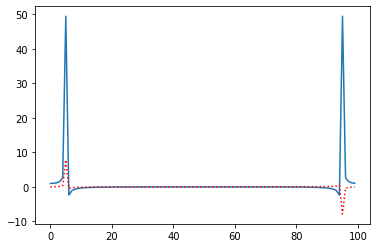

In [142]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,5,100)
y = np.cos(2*np.pi*t)
y_hat = np.fft.fft(y)

plt.plot(y_hat.real)            # C
plt.plot(y_hat.imag, 'r:')      # Imaginary part in red
plt.show()

Le résultat semble pour l'instant assez curieux, car on ne voit pas trop bien à quelles fréquences le résultat correspond. Essayons de construire le tableau des fréquences $f$, l'axe $x$ _correct_ du graphe précédent. Pour un signal temporel $[t_i]_{0\leq i\leq n}$ constitué de $n$ échantillons échantillonné tous les $\delta t = t_{i+1} - t_{i}$ : 
* la fréquence maximale 'calculable' par transformée de Fourier est $1/\delta t$. 
* la fréquence minimale 'calculable' est, elle, $1/t_n = 1/ (n \delta t)$

En fait, toutes les autres fréquences seront des multiples de $1/t_n$ : $2/t_n$, $3/t_n$, ... jusqu'à $n/t_n = 1/\delta t$. On va construire un tel _tableau_ des fréquences et retracer notre résultat. Comme notre $\cos$ prend pour argument $2\pi t$, on s'attend à ce que sa fréquence associée soit tout simplement $1$~Hz : 

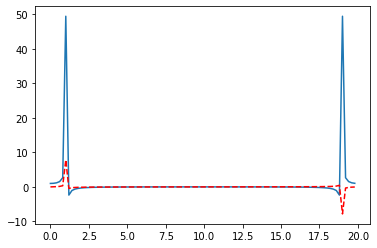

In [147]:
n = len(t)
t_n = max(t) # Take two first elements, then diff -> scalar
freqs_naive = np.arange(n)*1/t_n

plt.plot(freqs_naive, y_hat.real)
plt.plot(freqs_naive, y_hat.imag, 'r--')
plt.show()

On obtient bien un pic pour $f=1$, mais le deuxième pic reste toujours mystérieux, à part pour les plus mordus de Claude Shannon. Essayons d'y voir plus clair : notre signal de fréquence $f$ est échantillonné tous les $\delta t$. Mais pour savoir que le signal _oscille_ bien durant cette période, il nous faut __au moins deux__ échantillons par période $1/\delta f$. Ce _critère de Shannon_ nous indique que les fréquences de notre tableau `freqs` dépassant $1/(2\delta t) = 10$~Hz sont mal échantillonnées, et ne sont pas valides.

#### Créer un tableau des fréquences avec `fftfreq`

 _En fait_, par un heureux hasard, les amplitudes de Fourier _incorrectes_ liées au critère de Shannon (aux hautes fréquences) sont exactement les amplitudes de Fourier _correctes_, mais pour des fréquences _négatives_. Hein ? Cela veut dire que toute la partie de droite du graphe ci-dessus peut être _découpée_ et re-tracée à gauche de la partie gauche. 
 
 La fonction `np.fft.fftfreq()` permet de construire une _vraie_ échelle des fréquences à partir d'un nombre d'échantillons $n$ et d'un temps entre échantillons $\delta t$ :

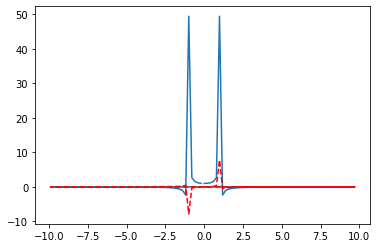

In [149]:
freqs_ok = np.fft.fftfreq(n, d=np.diff(t[:2]))

plt.plot(freqs_ok, y_hat.real)
plt.plot(freqs_ok, y_hat.imag, 'r--')
plt.show()

#### Transformées de Fourier à deux dimensions `fft2` et `fftshift`

